Calculating Network Metrics:

Degree Centrality: Measures how connected each node is by counting its immediate connections.

Closeness Centrality: Quantifies how close a node is to all other nodes, indicating how quickly information might spread from it through the network.

Betweenness Centrality: Shows the frequency with which a node lies on the shortest path between other nodes, identifying nodes that might be "bridges" in the network.

Number of nodes: 34
Number of edges: 78


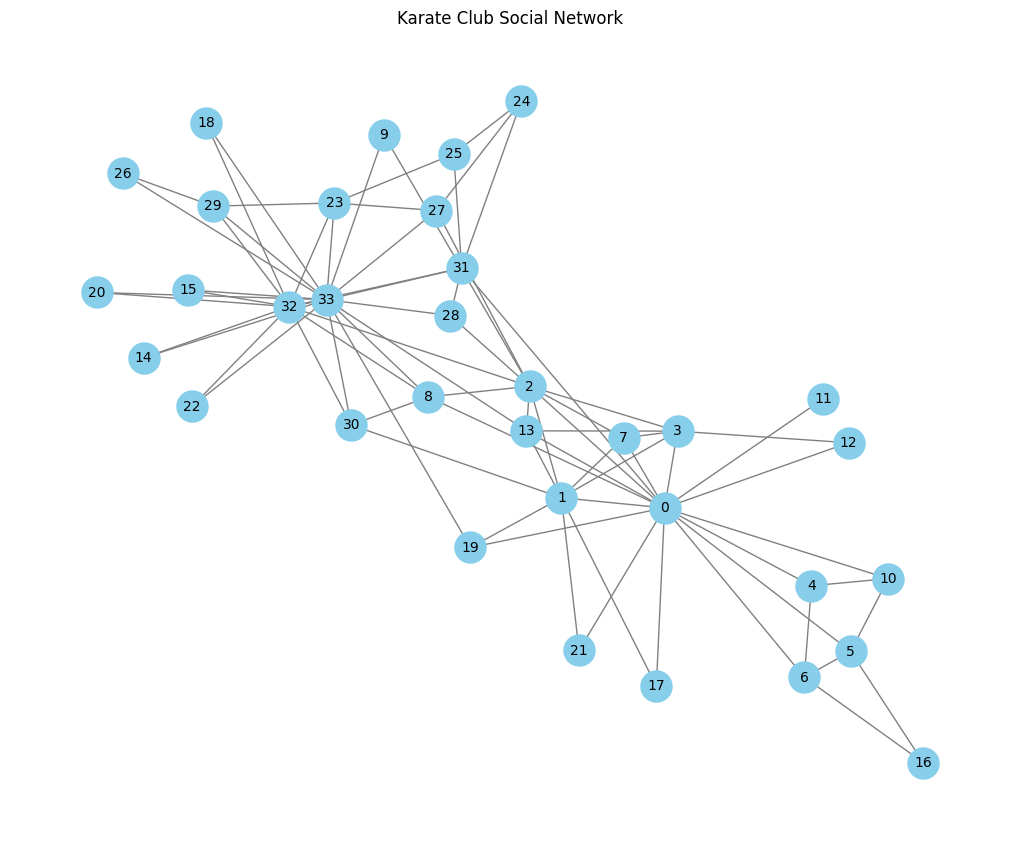

Degree Centrality: {0: 0.48484848484848486, 1: 0.2727272727272727, 2: 0.30303030303030304, 3: 0.18181818181818182, 4: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.15151515151515152, 9: 0.06060606060606061, 10: 0.09090909090909091, 11: 0.030303030303030304, 12: 0.06060606060606061, 13: 0.15151515151515152, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.09090909090909091, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.15151515151515152, 24: 0.09090909090909091, 25: 0.09090909090909091, 26: 0.06060606060606061, 27: 0.12121212121212122, 28: 0.09090909090909091, 29: 0.12121212121212122, 30: 0.12121212121212122, 31: 0.18181818181818182, 32: 0.36363636363636365, 33: 0.5151515151515151}
Closeness Centrality: {0: 0.5689655172413793, 1: 0.4852941176470588, 2: 0.559322033898305, 3: 0.4647887323943662, 4: 0.3793103448275862, 5: 0

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Load a graph dataset,  let's load a social network dataset - Karate Club (built-in in NetworkX)
G = nx.karate_club_graph()

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color="skyblue", edge_color="gray", node_size=500, font_size=10)
plt.title("Karate Club Social Network")
plt.show()

degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

print("Degree Centrality:", degree_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Betweenness Centrality:", betweenness_centrality)

Number of nodes: 2708
Number of edges: 5278


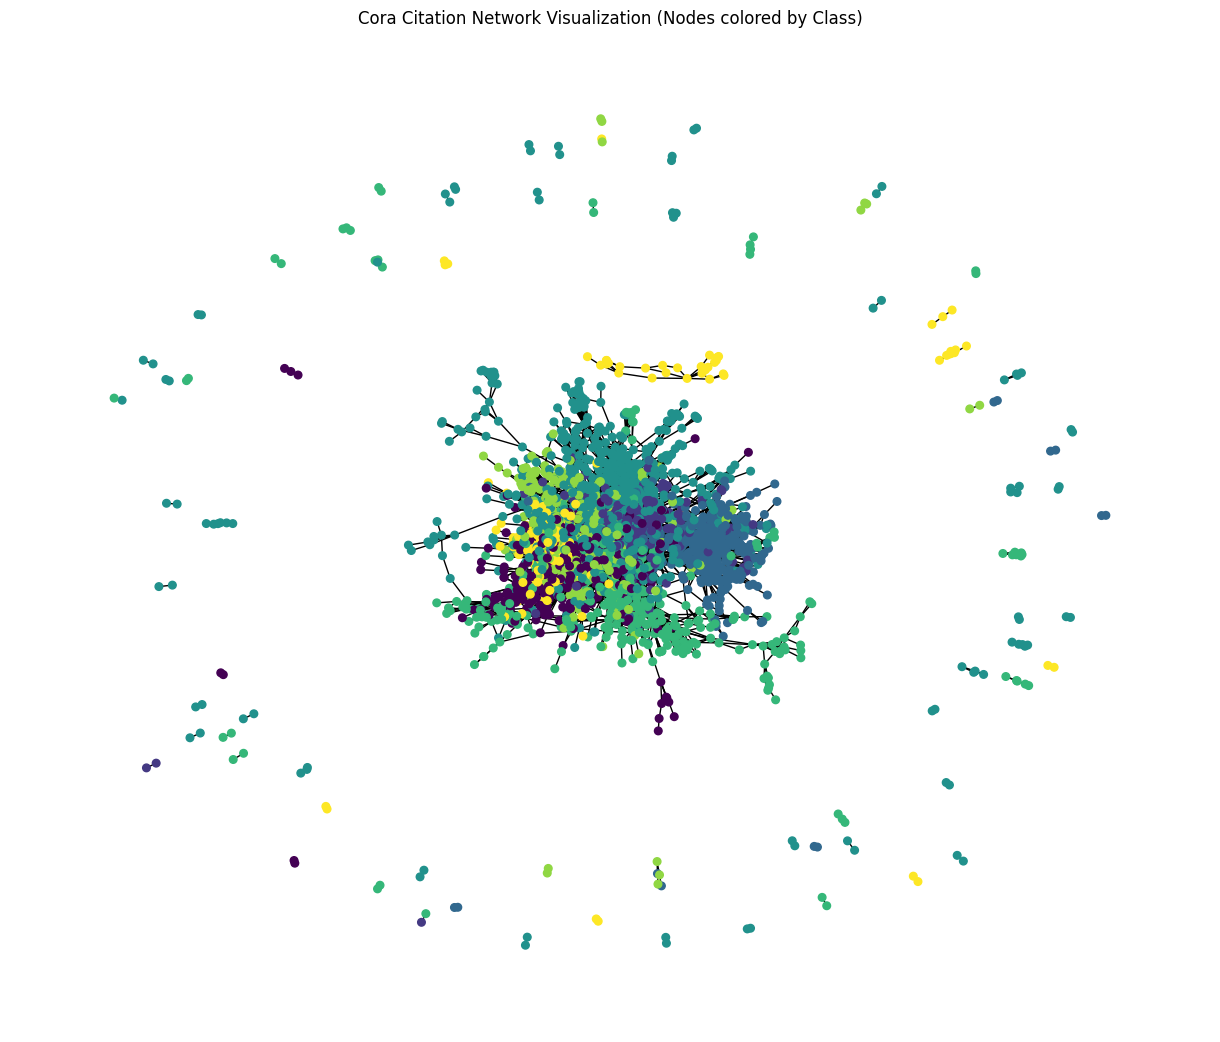

Top 5 Nodes by Degree Centrality:
[(1358, 0.062061322497229406), (306, 0.028814185445142224), (1701, 0.027336534909493903), (1986, 0.024011821204285185), (1810, 0.01625415589213151)]
Number of communities detected: 106
Top 3 largest communities (by number of nodes):
Community 1: 404 nodes
Community 2: 391 nodes
Community 3: 212 nodes
Top 5 Nodes by PageRank:
[(1358, 0.012206568911713374), (1701, 0.006250475261583526), (1986, 0.005352291709647111), (306, 0.005057525005822025), (1810, 0.0036313101875477772)]


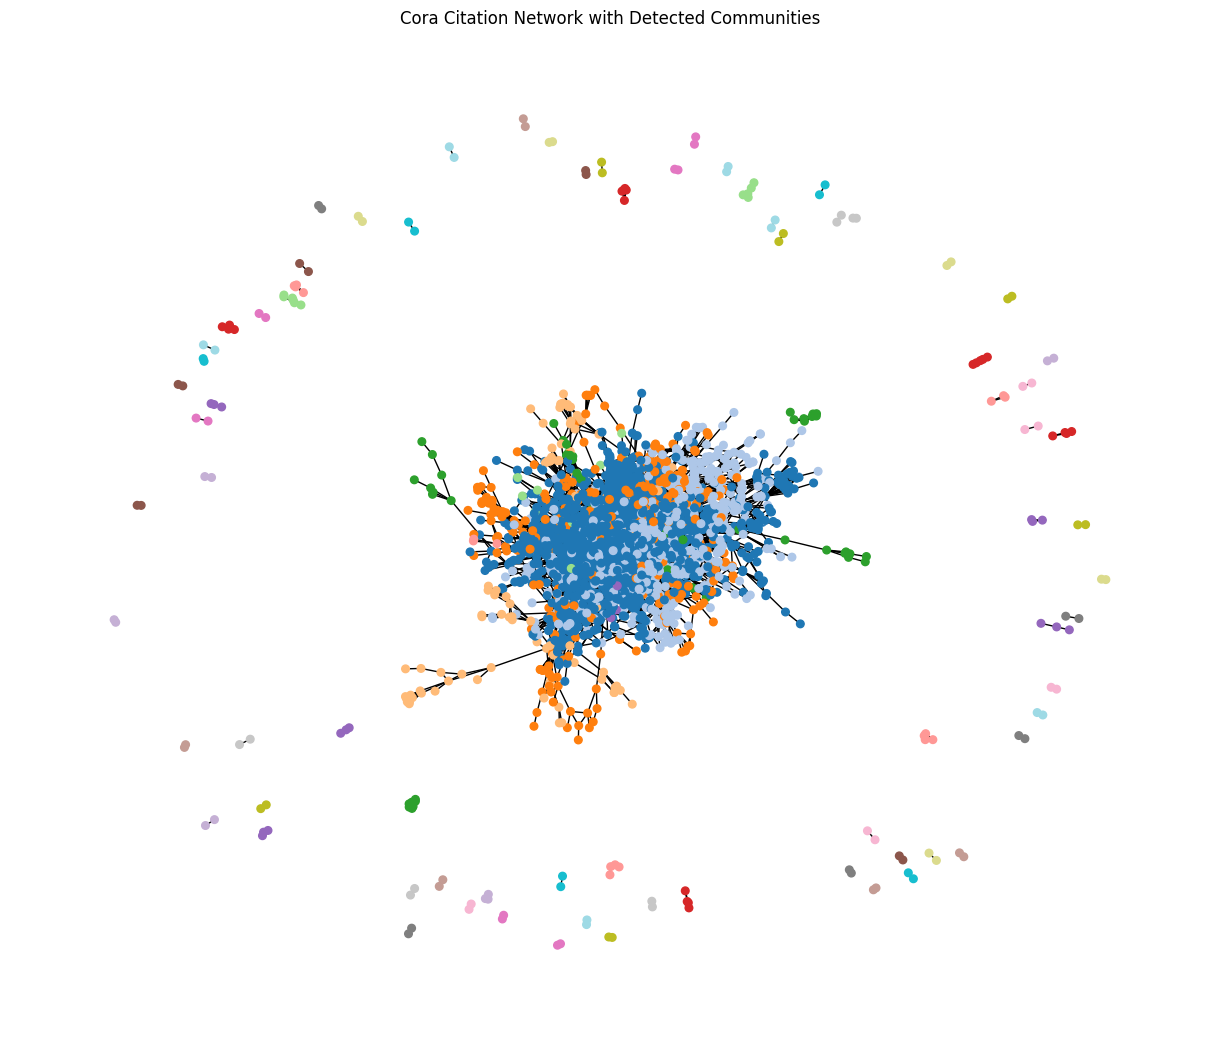

In [ ]:
import torch
from torch_geometric.datasets import Planetoid
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
from networkx.algorithms import community

# Load the Cora dataset from PyTorch Geometric, Convert the PyTorch Geometric data to a NetworkX graph for visualization and analysis
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]  # Get the first (and only) graph object
G = to_networkx(data, to_undirected=True)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

plt.figure(figsize=(12, 10))
nx.draw(G, node_size=30, node_color=data.y, cmap="viridis", with_labels=False)
plt.title("Cora Citation Network Visualization (Nodes colored by Class)")
plt.show()

# Advanced Graph Analysis

# 1. Degree Centrality - Finding important nodes
degree_centrality = nx.degree_centrality(G)
print("Top 5 Nodes by Degree Centrality:")
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

# 2. Community Detection - Finding groups in the graph
communities = community.greedy_modularity_communities(G)
print("Number of communities detected:", len(communities))
print("Top 3 largest communities (by number of nodes):")
for i, com in enumerate(communities[:3]):
    print(f"Community {i+1}: {len(com)} nodes")

# 3. PageRank - Identifying influential nodes
pagerank = nx.pagerank(G)
print("Top 5 Nodes by PageRank:")
print(sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5])

# 4. Visualizing Communities
# Create a color map for the communities
node_colors = {}
for i, com in enumerate(communities):
    for node in com:
        node_colors[node] = i

node_color_list = [node_colors.get(node, -1) for node in G.nodes()]
plt.figure(figsize=(12, 10))
nx.draw(G, node_color=node_color_list, cmap="tab20", node_size=30, with_labels=False)
plt.title("Cora Citation Network with Detected Communities")
plt.show()

**Network Graph for Famous French Novel:**


**Novel**: Les Misérables is a novel by Victor Hugo that follows the story of Jean Valjean, a former convict struggling to rebuild his life after 19 years in prison. Set against the backdrop of 19th-century France, the story explores themes of justice, love, and redemption. Valjean is pursued relentlessly by the zealous Inspector Javert while trying to protect Cosette, the daughter of a destitute woman named Fantine. Alongside personal struggles, the novel reflects the social and political unrest of the time, including the June Rebellion in Paris. Through its richly woven characters and moral dilemmas, Les Misérables delves deeply into the human condition and the pursuit of compassion and hope in a harsh world.




**Datasets**: The Les Misérables dataset is a character network based on Victor Hugo's novel, where nodes represent characters, and edges represent co-occurrences (shared appearances) within the same chapters. It captures relationships and interactions between characters, showing who appears together and how frequently. This network is often used to study the social structure of the novel and analyze character importance based on their connections.




**Calculating Centrality Metrics:**
Degree Centrality: Shows how many characters a node (character) interacts with directly.

Closeness Centrality: Indicates how close a character is to all others in terms of interactions.

Betweenness Centrality: Identifies characters who frequently lie on the shortest paths between other characters, acting as intermediaries.

Eigenvector Centrality: Measures a node's influence, considering its connections' influence.

Number of nodes: 77
Number of edges: 254


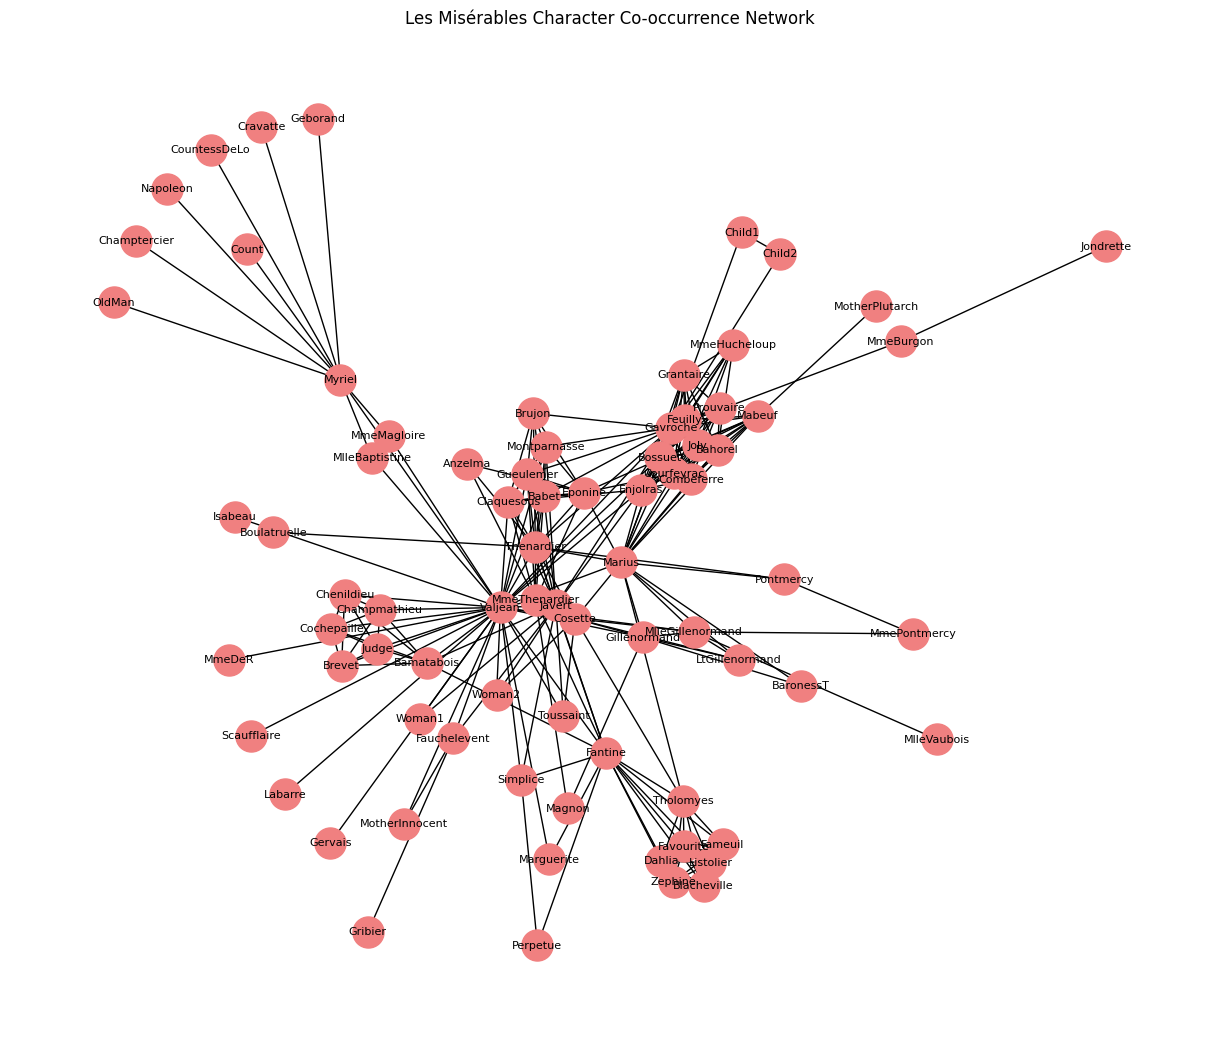

Top 5 Nodes by Degree Centrality: [('Valjean', 0.47368421052631576), ('Gavroche', 0.2894736842105263), ('Marius', 0.25), ('Javert', 0.22368421052631576), ('Thenardier', 0.21052631578947367)]
Top 5 Nodes by Closeness Centrality: [('Valjean', 0.6440677966101694), ('Marius', 0.5314685314685315), ('Thenardier', 0.5170068027210885), ('Javert', 0.5170068027210885), ('Gavroche', 0.5135135135135135)]
Top 5 Nodes by Betweenness Centrality: [('Valjean', 0.5699890527836184), ('Myriel', 0.17684210526315788), ('Gavroche', 0.16511250242584766), ('Marius', 0.132032488621946), ('Fantine', 0.12964454098819422)]
Top 5 Nodes by Eigenvector Centrality: [('Gavroche', 0.3178389397749768), ('Valjean', 0.2676181759885394), ('Enjolras', 0.2671786328235667), ('Marius', 0.25911114534178753), ('Bossuet', 0.24213078637474136)]


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.les_miserables_graph()

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
plt.figure(figsize=(12, 10))
nx.draw(G, with_labels=True, node_color="lightcoral", edge_color="black", node_size=500, font_size=8)
plt.title("Les Misérables Character Co-occurrence Network")
plt.show()
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Display metrics
print("Top 5 Nodes by Degree Centrality:", sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("Top 5 Nodes by Closeness Centrality:", sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("Top 5 Nodes by Betweenness Centrality:", sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("Top 5 Nodes by Eigenvector Centrality:", sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

In [ ]:
pip install torch torch-geometric networkx matplotlib